KNN BREAST CANCER DIAGNOSIS 

In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
import matplotlib.pyplot as plt 

#Step 1 - Read data 

In [14]:
column_headings = ["ID","Result","Mean_Radius","Mean_Texture","Mean_Perimeter",                    #setting the names of all the columns 
                   "Mean_Area","Mean_Smoothness","Mean_Compactness", "Mean_Concavity",
                   "Mean_ConcavePoints", "Mean_Symmetry","Mean_FractalDimension",
                   "SE_Radius","SE_Texture","SE_Perimeter","SE_Area","SE_Smoothness",
                   "SE_Compactness","SE_Concavity","SE_ConcavePoints","SE_Symmetry",
                   "SE_FractalDimension","Worst_Radius","Worst_Texture","Worst_Perimeter",
                   "Worst_Area","Worst_Smoothness","Worst_Compactness","Worst_Concavity",
                   "Worst_ConcavePoints","Worst_Symmetry","Worst_FractalDimension"]


data = pd.read_table('wdbc.data.txt', sep=",", names=column_headings)

In [15]:
data.head()

,ID,Result,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_ConcavePoints,...,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_ConcavePoints,Worst_Symmetry,Worst_FractalDimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Let's remove the ID Variable as we don't want to feed ID in as a parameter to our KNN

In [18]:
Data_noId = data.drop('ID', axis=1)

Next we need to suffle and normalise the data to ensure that the model is not trained on data that is sorted into catagories and that the data can fit on teh same scale.

In [26]:
scaler = StandardScaler()
data_suff_norm = scaler.fit(Data_noId.sample(frac=1).drop('Result', axis=1))
normalised_features = scaler.transform(Data_noId.sample(frac=1).drop('Result', axis=1))

In [28]:
model_data = pd.DataFrame(normalised_features, columns=column_headings[2:])

In [30]:
model_data.head()

,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_ConcavePoints,Mean_Symmetry,Mean_FractalDimension,...,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_ConcavePoints,Worst_Symmetry,Worst_FractalDimension
0,0.469393,-0.325708,0.479082,0.358672,0.052642,0.471115,0.134849,0.442131,0.110921,-0.280347,...,0.859560,0.261002,0.870902,0.735540,0.316995,1.950627,0.596387,1.010951,1.441838,1.155652
1,-0.905236,-0.162813,-0.888845,-0.810254,0.287488,-0.563636,-0.494155,-0.505540,-1.188815,0.475236,...,-0.801242,-0.015832,-0.729789,-0.717550,0.172337,-0.571667,-0.628420,-0.544141,-1.051162,-0.367175
2,-0.766069,-0.907474,-0.778867,-0.725500,0.002115,-0.671849,-0.675072,-0.520243,-0.283381,-0.587967,...,-0.817808,-0.595556,-0.814083,-0.735833,-0.586024,-0.569123,-0.634657,-0.454456,-0.363605,-0.903046
3,1.835501,0.453860,1.887787,1.891644,0.863928,1.138207,1.632155,1.629686,0.132826,-0.081882,...,1.571924,0.827699,1.666184,1.545938,0.615079,0.670714,1.178807,1.472317,-0.680690,0.334943
4,1.162387,-0.137215,1.166958,1.075386,1.312271,0.836879,1.109868,1.472343,1.023657,0.042867,...,0.896835,-0.251956,0.829202,0.774214,-0.191501,-0.156268,-0.047440,0.272461,0.194529,-0.225865


Now our data is clean and normalised we can select and train our model

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [45]:
results = Data_noId.sample(frac=1)['Result']

Lets split the data into a training set and a test set to evaluate our model performance

In [49]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(model_data,results, test_size = 0.3)

In [50]:
knn_model.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [51]:
predictions = knn_model.predict(x_test)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
print(confusion_matrix(y_test,predictions,labels=['B','M']))

[[60 53]
 [32 26]]


In [59]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          B       0.65      0.53      0.59       113
          M       0.33      0.45      0.38        58

avg / total       0.54      0.50      0.52       171



we got am accuracy of 54% - not that great so lets try and optimise the K value 

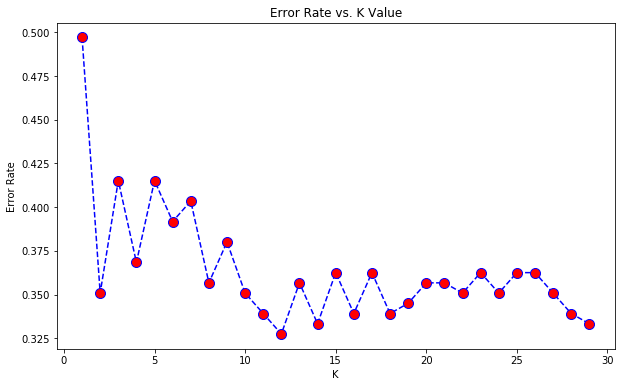

In [69]:
error_rate = []

for i in range (1,30):

      knn = KNeighborsClassifier(n_neighbors=i)
      knn.fit(x_train,y_train)
      pred_i = knn.predict(x_test)
      error_rate.append(np.mean(pred_i != y_test))


plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


In [70]:
new_model = KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)



In [71]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          B       0.68      0.96      0.79       113
          M       0.55      0.10      0.17        58

avg / total       0.63      0.67      0.58       171



63% with an optimal K value of 12. Still not fantastic but we did not do any EDA or feature engineering so this can be optimized a lot more!